In [134]:
# Kristina (temp code)
# crime-data correlation 

In [105]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.dates as mdates

In [133]:
df_sf_crime = pd.read_csv('sf-crime-results-20181007-143916.csv')
df_sf_crime['timestamp'] = pd.to_datetime(df_sf_crime['timestamp'], format="%Y%m%dT%H:%M:%S.%f")
df_sf_crime_subset= df_sf_crime[['timestamp', 'location', 'category']]
# need to get counts per capita
df = df_sf_crime_subset.groupby([df_sf_crime_subset['timestamp'].dt.year.astype(str) + '-' + df_sf_crime_subset['timestamp'].dt.month.astype(str)]).size().reset_index(name='Count')
df.head()
#df['timestamp']=pd.to_datetime(df_sf_crime['timestamp'], format="%Y-%m")

#df_temp = df_sf_crime_subset.groupby([df_sf_crime_subset['timestamp'].dt.to_period("M")]).agg({'count'})

,timestamp,Count
0,2003-1,56
1,2003-10,64
2,2003-11,71
3,2003-12,63
4,2003-2,49


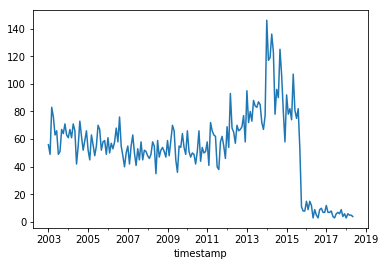

In [125]:
plt_crime = df_counts.plot()

In [124]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['timestamp'], df['Count'].values, test_size=0.33, random_state=42)

from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=2, random_state=0, n_estimators=100)
regr.fit(X_train.as_matrix().reshape(-1,1), y_train)

/home/kristina/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [126]:
y_pred = regr.predict(X_test.as_matrix().reshape(-1,1))

/home/kristina/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [127]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

740.8236690674327

In [128]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

-0.09856824581563073